<a href="https://colab.research.google.com/github/Abhay14tyagi/handwritten_digit_recognition/blob/main/number_recognition_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [45]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [46]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [47]:
X_train=X_train/255
X_test=X_test/255

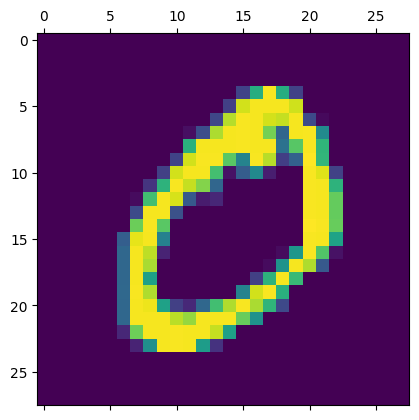

In [48]:
plt.matshow(X_train[1])

In [49]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1286 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0880 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0670 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0529 - accuracy: 0.9841


In [50]:
y_predict= model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


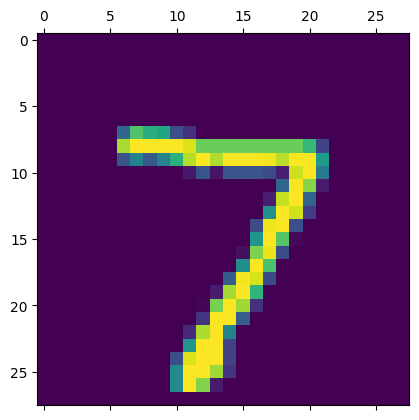

In [51]:
plt.matshow(X_test[0])

In [52]:
y_predict[0]

array([2.7449527e-03, 4.7986206e-04, 6.8456686e-01, 9.7914469e-01,
       2.3876878e-06, 1.3665112e-02, 3.1434912e-08, 9.9998695e-01,
       2.9533140e-02, 3.7027560e-02], dtype=float32)

In [53]:
np.argmax(y_predict[0])

7

In [54]:
import seaborn as sns

Text(70.72222222222221, 0.5, 'true')

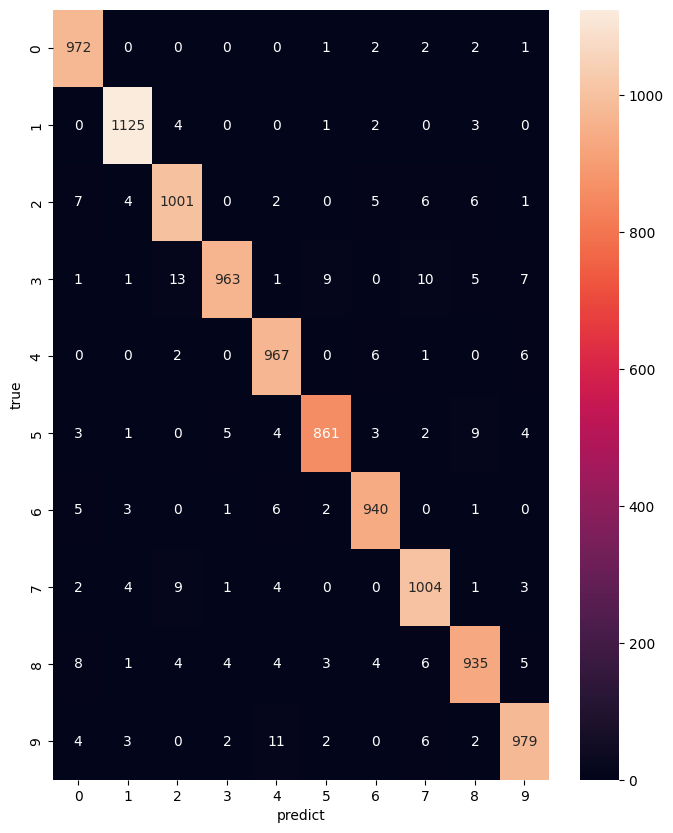

In [55]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(8,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predict')
plt.ylabel('true')
